In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
import torchaudio
import pandas as pd

from torch import nn
from torch.utils.data import Dataset


from pitch_tracker.utils import dataset
from pitch_tracker.utils.constants import (F_MIN, HOP_LENGTH, N_FFT, N_MELS,
                                           PICKING_FRAME_SIZE,
                                           PICKING_FRAME_STEP,
                                           PICKING_FRAME_TIME, SAMPLE_RATE,
                                           STEP_FRAME, STEP_TIME, WIN_LENGTH,
                                           N_CLASS, )

/Users/tien.d/workspace/GITHUB/mono_pitch_tracker/medleydb/medleydb/__init__.py:69: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  INST_TAXONOMY = yaml.load(fhandle)
/Users/tien.d/workspace/GITHUB/mono_pitch_tracker/medleydb/medleydb/__init__.py:77: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  MIXING_COEFFICIENTS = yaml.load(fhandle)


In [2]:
device = "cuda" if torch.cuda.is_available() \
    else "mps" if torch.backends.mps.is_available()\
    else "cpu"
print(f"Using {device} device")

Using mps device


In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class AudioDataset(Dataset):
    def __init__(self, dataset_dir: str, transform=None, target_transform=None):
        self.img_dir = dataset_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [64]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(1, 32, 3),
            # nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3),
            # nn.Linear(6*, 512),
            # nn.ReLU(),
            # nn.Linear(512, 10),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

    model = NeuralNetwork().to(device)
print(model)

In [66]:
label_folder = '../content/gen_label/2560/Melody2_midi/'
label_dict = dataset.create_label_dict_from_dir(label_folder)
dataset_paths = dataset.create_dataset_path_dict(label_folder)
feature_label_gen = dataset.create_feature_label_generator(
    dataset_path_dict=dataset_paths, 
    sample_rate= SAMPLE_RATE,
    n_fft= N_FFT,
    n_mels= N_MELS,
    n_class= N_CLASS,
    hop_length= HOP_LENGTH,
    picking_frame_step= PICKING_FRAME_STEP,
    picking_frame_size= PICKING_FRAME_SIZE,
    step_frame= STEP_FRAME,
    step_time= STEP_TIME,
    dist_threshold= 0.1,
    empty_threshold= 0.3,
)

for song_name, feature_label_pair in feature_label_gen:
    n_big_frame = 0
    for feature, label in feature_label_pair:
        print(feature.shape)
        print(label[0].shape)
        print(label[1].shape)
        print(label[2].shape)
        n_big_frame+=1
        break
    break

/Users/tien.d/workspace/GITHUB/mono_pitch_tracker/medleydb/medleydb/multitrack.py:371: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  metadata = yaml.load(f_in)


(1050, 88)
(210,)
(210,)
(210, 88)


In [21]:
feature_torch = torch.from_numpy(feature).unsqueeze(dim=0)
feature_torch.shape

torch.Size([1, 1050, 88])

In [68]:
learning_rate = 1e-3
batch_size = 8
epochs = 5

conv2d_layer_1 = nn.Conv2d(1, 32, 3)
batchnorm2d_layer_1 = nn.BatchNorm2d(32)
relu_layer_1 = nn.ReLU()
conv2d_layer_2 = nn.Conv2d(32, 32, 3)

out = conv2d_layer_1(feature_torch.type(torch.float32))
out = batchnorm2d_layer_1(out)
out = relu_layer_1(out)
out = conv2d_layer_2(out)
out.shape

ValueError: expected 4D input (got 3D input)

In [55]:
from matplotlib import pyplot as plt

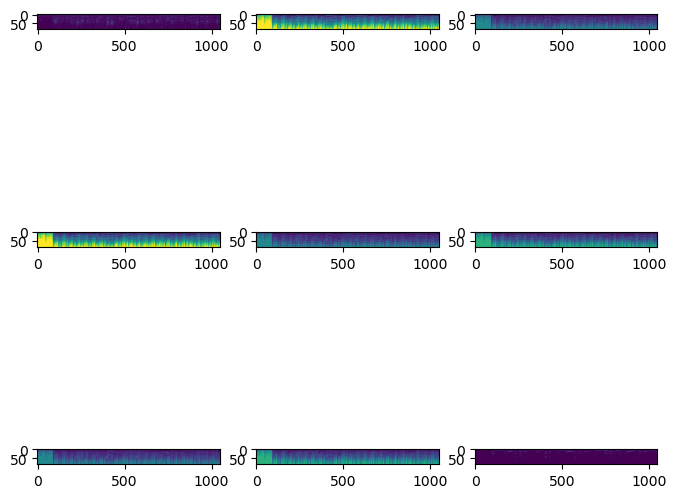

In [59]:
out1_np=out1.type(torch.int).numpy()
n_channels, w, h = out1_np.shape
nn_channels = int((n_channels+1)/2)
fig, axes = plt.subplots(nn_channels, nn_channels, figsize=(8,8))
for i in range(nn_channels):
    for j in range(nn_channels):
        axes[i,j].imshow(out1_np[i+j].T)
# plt.imshow(out1_np[2])

In [52]:
nn_channels

1